In [15]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt



            

# Reflect Tables into SQLAlchemy ORM

In [18]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.sql import label
from sqlalchemy import func
from sqlalchemy.ext.automap import automap_base
from sqlalchemy import create_engine, MetaData
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine,inspect,func
import pandas as pd
from sqlalchemy import Column, Integer, String, Numeric, Text, Float,Table,ForeignKey
from flask import jsonify


import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib

from datetime import datetime,timedelta
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
session=Session(bind=engine)


In [19]:
inspector=inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [20]:
columns=inspector.get_columns('Measurements')
for c in columns:
    print(c['name'],c['type'])

In [21]:
engine.execute('SELECT * FROM measurement LIMIT 15').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (13, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (14, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (15, 'USC00519397', '2010-01-17', 0.0, 64.0)]

In [22]:
engine.execute("SELECT * FROM MEASUREMENT WHERE prcp>'0'").fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (22, 'USC00519397', '2010-01-24', 0.01, 71.0),
 (24, 'USC00519397', '2010-01-26', 0.04, 76.0),
 (25, 'USC00519397', '2010-01-27', 0.12, 68.0),
 (28, 'USC00519397', '2010-01-31', 0.03, 67.0),
 (29, 'USC00519397', '2010-02-01', 0.01, 66.0),
 (31, 'USC00519397', '2010-02-04', 0.01, 69.0),
 (38, 'USC00519397', '2010-02-12', 0.02, 69.0),
 (39, 'USC00519397', '2010-02-13', 0.01, 69.0),
 (45, 'USC00519397', '2010-02-20', 0.03, 64.0),
 (53, 'USC00519397', '2010-03-01', 0.01, 70.0),
 (56, 'USC00519397', '2010-03-04', 0.12, 70.0),
 (57, 'USC00519397', '2010-03-05', 0.08, 71.0),
 (58, 'USC00519397', '2010-03-06', 0.03, 72.0),
 (60, 'USC00519397', '2010-03-08', 0.43, 69.0),
 (61, 'USC00519397', '2010-03-09', 0.06, 70.0),
 (66, 'USC00519397', '2010-03-15', 0.06, 71.0),
 (80, 'USC00519397', '2010-04-02', 0.01, 74.0),
 (81, 'USC00519397', '2010-04-03', 0.17, 7

In [23]:
#Base = declarative_base()

# # Station table
# class Station(Base):
#     __tablename__ = 'station'

#     station = Column(String(12), primary_key=True)
#     name = Column(String(100))
#     latitude = Column(Float)
#     longitude = Column(Float)
#     elevation = Column(Float)
    
# # Measurement table
# class Measurement(Base):
#     __tablename__ = 'measurement'

#     id = Column(Integer, primary_key=True)
#     station = Column(String(12), ForeignKey("Station.station"))
#     date = Column(Text)
#     prcp = Column(Float)
#     tobs = Column(Float)
    
#     def __repr__(self):
#         return f"id={self.id}, name={self.station}"

In [24]:
Base=automap_base()

In [25]:
# Save references to each table
Base.prepare(engine,reflect=True)



In [26]:
Base.classes.keys()

['measurement', 'station']

In [27]:
Measurement = Base.classes.measurement
Station = Base.classes.station

In [28]:
results = session.query(Measurement.tobs).all()

# Convert list of tuples into normal list
tobs_values = list(np.ravel(results))
tobs_values

[65.0,
 63.0,
 74.0,
 76.0,
 73.0,
 70.0,
 64.0,
 68.0,
 73.0,
 64.0,
 61.0,
 66.0,
 65.0,
 68.0,
 64.0,
 72.0,
 66.0,
 66.0,
 69.0,
 67.0,
 67.0,
 71.0,
 67.0,
 76.0,
 68.0,
 72.0,
 70.0,
 67.0,
 66.0,
 67.0,
 69.0,
 67.0,
 67.0,
 64.0,
 69.0,
 73.0,
 73.0,
 69.0,
 69.0,
 69.0,
 71.0,
 61.0,
 69.0,
 63.0,
 64.0,
 65.0,
 67.0,
 68.0,
 65.0,
 76.0,
 75.0,
 66.0,
 70.0,
 72.0,
 73.0,
 70.0,
 71.0,
 72.0,
 72.0,
 69.0,
 70.0,
 73.0,
 72.0,
 73.0,
 70.0,
 71.0,
 68.0,
 70.0,
 72.0,
 69.0,
 68.0,
 74.0,
 72.0,
 72.0,
 73.0,
 74.0,
 73.0,
 73.0,
 74.0,
 74.0,
 74.0,
 71.0,
 72.0,
 75.0,
 75.0,
 75.0,
 75.0,
 73.0,
 73.0,
 71.0,
 71.0,
 68.0,
 70.0,
 71.0,
 74.0,
 71.0,
 75.0,
 76.0,
 75.0,
 75.0,
 76.0,
 76.0,
 76.0,
 77.0,
 77.0,
 73.0,
 74.0,
 76.0,
 76.0,
 80.0,
 74.0,
 77.0,
 77.0,
 76.0,
 77.0,
 78.0,
 78.0,
 75.0,
 73.0,
 77.0,
 76.0,
 77.0,
 77.0,
 78.0,
 75.0,
 77.0,
 77.0,
 77.0,
 76.0,
 75.0,
 77.0,
 77.0,
 77.0,
 78.0,
 76.0,
 78.0,
 76.0,
 77.0,
 78.0,
 77.0,
 78.0,
 78.0,
 79.0,

In [29]:
DUMMY=session.query(Measurement.prcp)

In [30]:
print(DUMMY)

SELECT measurement.prcp AS measurement_prcp 
FROM measurement


In [119]:
last_12_months_precipitation = session.query(Measurement.date, Measurement.prcp).\
        filter(Measurement.date >= '2017-07-04').filter(Measurement.date <= '2018-07-04').order_by(Measurement.date).all()
df12months=pd.DataFrame(last_12_months_precipitation,columns=["date","prcp"])
df12months = df12months.set_index("date")
# Design a query to retrieve the last 12 months of precipitation data and plot the results
def prcp_data():
    current_time=datetime.now()
    past_year=current_time-timedelta(days=365)
    measurements_year=session.query(Measurements.date,
               Measurements.prcp).filter(Measurements.date>past_year).all()
    
    measure_records=[]
    for measure in measurements_year:
        measure_records.append(measure._asdict())

    measurements_df=pd.DataFrame.from_records(measure_records)
    measurements_df=measurements_df.set_index('date')

    return measurements_df

    prcp_data()

    
    
    
    
# Calculate the date 1 year ago from today

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

# Rotate the xticks for the datesdf12months.head(25)

<IPython.core.display.Javascript object>


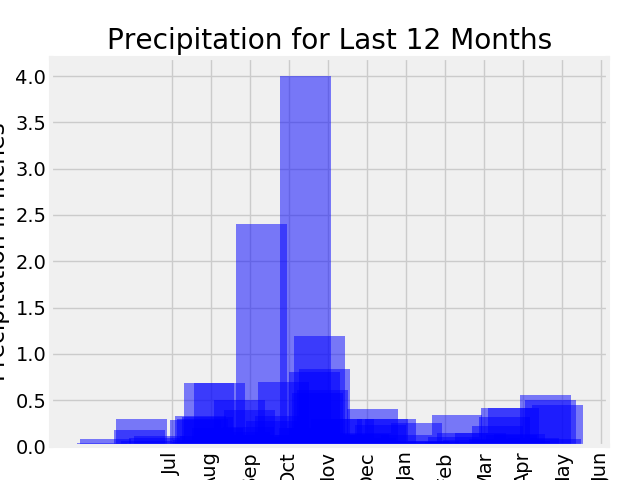

([<matplotlib.axis.XTick at 0x191f8a084a8>,
 <a list of 12 Text xticklabel objects>)

In [32]:


# Define labels
plt.title("Precipitation for Last 12 Months")
plt.xlabel("Month")
plt.ylabel("Precipitation in Inches")

months=["Jul","Aug","Sep","Oct","Nov","Dec","Jan","Feb","Mar","Apr","May","Jun"]

y=df12months["prcp"].tolist()
x=np.arange(0,len(df12months.index.tolist()),1)

month_total=len(y)
month_step_xticks=int((month_total/12)*1.03)
plt.ylim=max(y)+1
tick_locations=[x+55 for x in range(1,month_total,month_step_xticks)]

plt.bar(x,y,width=30,color="blue",alpha=0.5,align="edge")
plt.xticks(tick_locations,months,rotation='vertical')

In [33]:



# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)


In [34]:
# We can view all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [35]:
# Create our session (link) from Python to the DB
session = Session(engine)

results=session.query(Measurement.tobs).all()

tobs_values=list(np.ravel(results))
tobs_values

[65.0,
 63.0,
 74.0,
 76.0,
 73.0,
 70.0,
 64.0,
 68.0,
 73.0,
 64.0,
 61.0,
 66.0,
 65.0,
 68.0,
 64.0,
 72.0,
 66.0,
 66.0,
 69.0,
 67.0,
 67.0,
 71.0,
 67.0,
 76.0,
 68.0,
 72.0,
 70.0,
 67.0,
 66.0,
 67.0,
 69.0,
 67.0,
 67.0,
 64.0,
 69.0,
 73.0,
 73.0,
 69.0,
 69.0,
 69.0,
 71.0,
 61.0,
 69.0,
 63.0,
 64.0,
 65.0,
 67.0,
 68.0,
 65.0,
 76.0,
 75.0,
 66.0,
 70.0,
 72.0,
 73.0,
 70.0,
 71.0,
 72.0,
 72.0,
 69.0,
 70.0,
 73.0,
 72.0,
 73.0,
 70.0,
 71.0,
 68.0,
 70.0,
 72.0,
 69.0,
 68.0,
 74.0,
 72.0,
 72.0,
 73.0,
 74.0,
 73.0,
 73.0,
 74.0,
 74.0,
 74.0,
 71.0,
 72.0,
 75.0,
 75.0,
 75.0,
 75.0,
 73.0,
 73.0,
 71.0,
 71.0,
 68.0,
 70.0,
 71.0,
 74.0,
 71.0,
 75.0,
 76.0,
 75.0,
 75.0,
 76.0,
 76.0,
 76.0,
 77.0,
 77.0,
 73.0,
 74.0,
 76.0,
 76.0,
 80.0,
 74.0,
 77.0,
 77.0,
 76.0,
 77.0,
 78.0,
 78.0,
 75.0,
 73.0,
 77.0,
 76.0,
 77.0,
 77.0,
 78.0,
 75.0,
 77.0,
 77.0,
 77.0,
 76.0,
 75.0,
 77.0,
 77.0,
 77.0,
 78.0,
 76.0,
 78.0,
 76.0,
 77.0,
 78.0,
 77.0,
 78.0,
 78.0,
 79.0,

# Exploratory Climate Analysis

In [40]:
def showprcp():
    measurements_df = prcp_data()

    measurements_df.plot(kind="line",linewidth=4,figsize=(15,10))

    plt.style.use('fivethirtyeight')

    matplotlib.rcParams.update({'font.size': 16})

    plt.xlabel("Date")
    plt.ylabel("Precipitation")
    plt.title(f"Precipitation analysis of past year")
    plt.xticks(rotation=45)
    plt.legend(["Precipitation"])
    plt.tight_layout()
    plt.savefig("figures/PrecipitationAnalysis_Hawaii.png")
    
    plt.show()

In [42]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df12months.describe()

,prcp
count,244.000000
mean,0.111393
std,0.335544
min,0.000000
25%,0.000000
50%,0.010000
75%,0.090000
max,4.000000


In [43]:
# How many stations are available in this dataset?
numberstations=session.query(func.count(Station.station)).first()
print(f"Total number of stations:  {str(numberstations[0])}")

Total number of stations:  9


In [49]:

# Query to find the most active stations# Query  
active_stations_desc = session.query(Measurement.station, func.count(Measurement.station)).\
        group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

# Set above query results to dataframe
df_active_stations_desc = pd.DataFrame(data=active_stations_desc, columns=['Station', 'Count'])
df_active_stations_desc.head()

,Station,Count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612


In [83]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

hi_active_stations = session.query(Measurement.station, func.max(Measurement.tobs)).all()
df_hi=pd.DataFrame(data=hi_active_stations,columns=['Station', 'Maximum'])
df_hi.head()

,Station,Maximum
0,USC00519397,87.0


In [85]:


lo_active_stations = session.query(Measurement.station, func.min(Measurement.tobs)).all()
df_lo=pd.DataFrame(data=lo_active_stations,columns=['Station', 'Minimum'])
df_lo.head()

,Station,Minimum
0,USC00511918,53.0


In [89]:



avg_active_stations = session.query(func.avg(Measurement.tobs)).all()
df_avg=pd.DataFrame(data=avg_active_stations,columns=['Average'])
df_avg.head()

,Average
0,73.097954


In [90]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_most_ob=df_active_stations_desc["Station"][0]
most_ob=df_active_stations_desc["Count"][0]
print(f"Station with the most observations ({most_ob}): {station_most_ob}")


Station with the most observations (2772): USC00519281


In [91]:
temp_freq=session.query(Measurement.tobs).\
    filter(Measurement.date>='2017-07-04').\
    filter(Measurement.station==station_most_ob).\
    order_by(Measurement.tobs).all()
    
temp_freq

[(69.0),
 (72.0),
 (74.0),
 (74.0),
 (74.0),
 (75.0),
 (75.0),
 (75.0),
 (76.0),
 (76.0),
 (76.0),
 (76.0),
 (76.0),
 (76.0),
 (76.0),
 (76.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (78.0),
 (78.0),
 (78.0),
 (79.0),
 (80.0),
 (80.0),
 (81.0),
 (81.0),
 (82.0),
 (82.0),
 (82.0),
 (83.0)]

In [68]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

def last_year_dates(start_date, end_date):
    """ Corresponding dates from previous year
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        start_date (string)
        end_date (string)
    """
    lst_start_date = start_date.split('-')
    lst_end_date = end_date.split('-')
    lastyear_start_year = int(lst_start_date[0]) - 1
    lastyear_end_year = int(lst_end_date[0]) - 1
    ly_start_date = f"{lastyear_start_year}-{lst_start_date[1]}-{lst_start_date[2]}"
    ly_end_date = f"{lastyear_end_year}-{lst_end_date[1]}-{lst_end_date[2]}"
    
    return (ly_start_date, ly_end_date)

[(62.0, 69.57142857142857, 74.0)]


In [76]:
trip_start = '2015-02-28'
trip_end = '2015-03-05'

# Call function to return average temperatures for this date range
average_trip_temps = calc_temps(trip_start, trip_end)

# Call function to grab lates from last year
(lastyear_start_date, lastyear_end_date) = last_year_dates(trip_start, trip_end)

In [77]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps('2017-02-28','2017-03-05'))

[(64.0, 72.02777777777777, 78.0)]


In [106]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)



def  calctemps (startdate,enddate):
    compstart = startdate - timedelta(days=365)
    compend = enddate - timedelta(days=365)
    
    temperature_vacation = session.query(label('max_temp',func.max(Measurement.tobs)),\
                                     label('min_temp',func.min(Measurement.tobs)),\
                                     label('avg_temp',func.avg(Measurement.tobs))).\
                    filter(Measurement.date >= compstart).\
                    filter(Measurement.date <= compend)
    
    Max_temp = temperature_vacation[0].max_temp
    Min_temp = temperature_vacation[0].min_temp
    Avg_temp = temperature_vacation[0].avg_temp
    
    yerror = Max_temp - Min_temp
    
    barvalue = [Avg_temp]
    xvals = range(len(barvalue))
    matplotlib.rcParams.update({'font.size': 12})
    
    fig,ax = plt.subplots(figsize=(5,10))
    ax.bar(xvals, barvalue, yerr=yerror, color='g',alpha=0.6)
    ax.set_xticks([1]) 
    plt.xlabel("Vacation time period")
    plt.ylabel("Temperature")
    plt.title("Trip Average Temperature")
    plt.tight_layout()
    plt.savefig("Tripavg.png")
    
    plt.show()
    


<IPython.core.display.Javascript object>


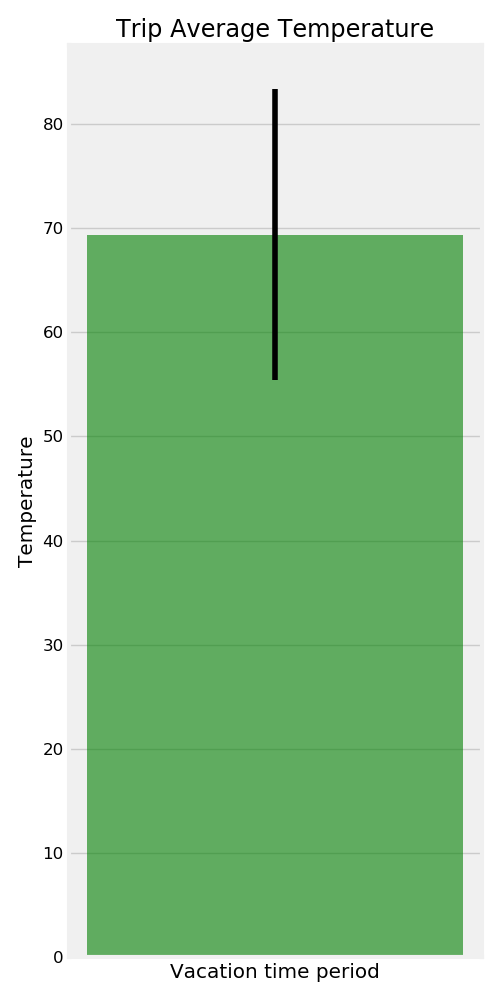

In [107]:
calctemps(datetime(2017,2,28),datetime(2017,3,5))

In [117]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

def rainfall(start,end):
    comps=start-timedelta(days=365)
    compe=end-timedelta(days=365)
    
    rainfall_station=session.query(Station.name,Station.station,label('Average Rainfall',func.avg(Measurement.prcp))).\
                        filter(Measurement.station==Station.station).\
                        filter(Measurement.date >=comps).\
                        filter(Measurement.date <=compe).\
        group_by(Station.name,Station.station).order_by(func.avg(Measurement.prcp))
        
    df_rain=pd.DataFrame(query_to_dict(rainfall_station))
    
    return df_rain

def query_to_dict(res):
    res_dict=[]
    for rec in res:
        res_dict.append(rec)
    
    return res_dict

def replace(value):
    for value in train:
        if train['value'].isnull():
           train['value'] = 0.00
        
        train = train.apply(replace,axis=1)

In [118]:
rainfall(datetime(2017,2,28),datetime(2017,3,5))

,name,station,Average Rainfall
0,"PEARL CITY, HI US",USC00517948,NaN
1,"KANEOHE 838.1, HI US",USC00513117,0.000000
2,"WAIKIKI 717.2, HI US",USC00519397,0.000000
3,"WAIHEE 837.5, HI US",USC00519281,0.002000
4,"MANOA LYON ARBO 785.2, HI US",USC00516128,0.006667
5,"KUALOA RANCH HEADQUARTERS 886.9, HI US",USC00514830,0.014000
6,"WAIMANALO EXPERIMENTAL FARM, HI US",USC00519523,0.066000


## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


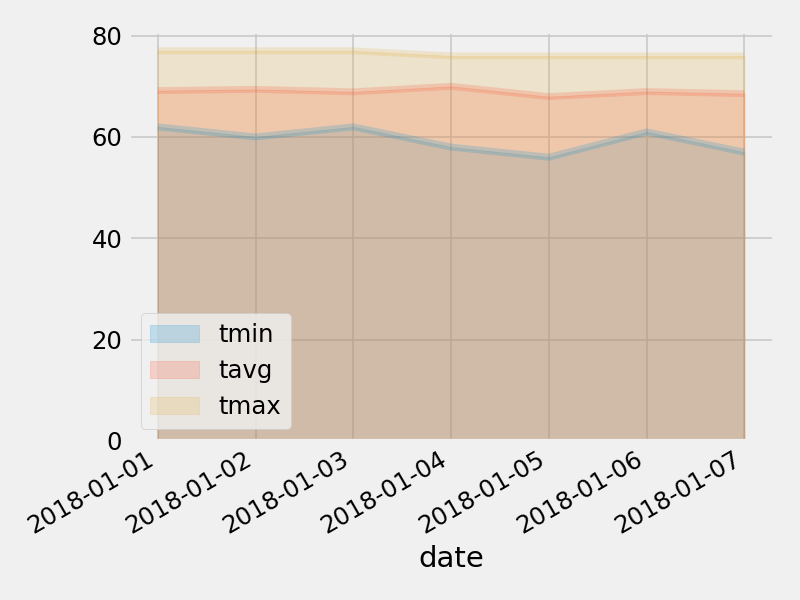

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
